In [1]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

In [2]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,Dt::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)                 #Usamos un for para poder hacer el proceso
        x0=x0-(x0*γ*Δt)+(sqrt(2*Dt*Δt)*randn())+cte # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

In [3]:
function eigen2(n::Int64,K::Array{Float64,1},Δt::Float64) #Obtenemos los eigenvalores y eigenvectores 
    R=diagm(0 =>ones(2))                                #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n                                           #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(2))+diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)+(0.5*diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigen(R)#Obtenemos el eigenvalor y eigenvector
end

function eigen2(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δt::Float64) 
    R=diagm(0 =>ones(3)) #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n            #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigen(R) #Obtenemos el eigenvalor y eigenvector
end

eigen2 (generic function with 2 methods)

In [4]:

function Mat(n::Int64,K::Array{Float64,1},T::Array{Float64,1},Δt::Float64) 
    R=diagm(0 =>ones(3))
    for i=1:n
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R
    end
    R
end

function Mat(n::Int64,K::Array{Float64,1},Δt::Float64) #Solo muestra las matrices despues de ser multiplicadas
    R=diagm(0 =>ones(2))
    for i=1:n
       R=(diagm(0 => ones(2))+diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)+(0.5*diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)^2))*R
    end
    R
end


Mat (generic function with 2 methods)

In [5]:
function Trayectoria(γ::Float64,Δt::Float64,t::AbstractArray,Dt::Float64,k0::Float64,t0::Float64,K::AbstractArray,T::AbstractArray)
    #T=ones(2001)*5
    #K=ones(2001)*5

    #T_v0=(eigen2(2,K,T,Δt).vectors)[:,1]      #Es el vector tangente inicial
    #N_v0=(eigen2(2,K,T,Δt).vectors)[:,2]*im   #Es el vector tangente inicial
    #B_v0=(eigen2(2,K,T,Δt).vectors)[:,3]      #Es el vector tangente inicial
    T_v0=[1.0,0.0,0.0]     #Es el vector tangente inicial
    N_v0=[0.0,1.0,0.0]   #Es el vector tangente inicial
    B_v0=[0.0,0.0,1.0]      #Es el vector tangente inicial
    ##########################################
    T_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    N_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    B_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    for i=1:length(t)                 #For que dura todos los pasos de tiempo
        T_v1=Mat(i,K,T,Δt)*T_v0      #Genera todos los vecotres tangentes a partir del inicial
        N_v1=Mat(i,K,T,Δt)*N_v0      #Genera todos los vecotres tangentes a partir del inicial
        B_v1=Mat(i,K,T,Δt)*B_v0      #Genera todos los vecotres tangentes a partir del inicial
        push!(T_v,real(T_v1))    #Coloca los vectores tangentes en una lista
        push!(N_v,real(N_v1))    #Coloca los vectores tangentes en una lista
        push!(B_v,real(B_v1))    #Coloca los vectores tangentes en una lista
    end
    T_v=transpose(hcat(T_v...))     #Transforma T en algo mejor
    N_v=transpose(hcat(N_v...))     #Transforma N en algo mejor
    B_v=transpose(hcat(B_v...))     #Transforma B en algo mejor
    ##########################################
    Tx=T_v[:,1]
    Ty=T_v[:,2]
    Tz=T_v[:,3]
    ##########################################
    rx=Float64[]
    ry=Float64[]
    rz=Float64[]
    r1x=0.0
    r1y=0.0
    r1z=0.0
    for i=1:length(t)
        r1x=Tx[i]*Δt+r1x
        r1y=Ty[i]*Δt+r1y
        r1z=Tz[i]*Δt+r1z
        push!(rx,r1x)
        push!(ry,r1y)
        push!(rz,r1z)
    end
    r=[rx,ry,rz]
    T=[Tx,Ty,Tz]
    N=[N_v[:,1],N_v[:,2],N_v[:,3]]
    B=[B_v[:,1],B_v[:,2],B_v[:,3]]
    return r,T,N,B
end




function Trayectoria(γ::Float64,Δt::Float64,t::AbstractArray,Dt::Float64,k0::Float64,K::AbstractArray)
    #T=ones(2001)*5
    T_v0=(eigen2(2,K,Δt).vectors)[:,1]      #Es el vector tangente inicial
    N_v0=(eigen2(2,K,Δt).vectors)[:,2]*im   #Es el vector tangente inicial
    #T_v0=[1.0,0.0]     #Es el vector tangente inicial
    #N_v0=[0.0,1.0]   #Es el vector tangente inicial
    ##########################################
    T_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    N_v=Array{Float64,1}[]       #Lista vacia para todos los vectores tangentes
    for i=1:length(t)                 #For que dura todos los pasos de tiempo
        T_v1=Mat(i,K,Δt)*T_v0      #Genera todos los vecotres tangentes a partir del inicial
        N_v1=Mat(i,K,Δt)*N_v0      #Genera todos los vecotres tangentes a partir del inicial
        push!(T_v,real(T_v1))    #Coloca los vectores tangentes en una lista
        push!(N_v,real(N_v1))    #Coloca los vectores tangentes en una lista
    end
    T_v=transpose(hcat(T_v...))     #Transforma T en algo mejor
    N_v=transpose(hcat(N_v...))     #Transforma N en algo mejor
    ##########################################
    Tx=T_v[:,1]
    Ty=T_v[:,2]
    ##########################################
    rx=Float64[]
    ry=Float64[]
    r1x=0.0
    r1y=0.0
    for i=1:length(t)
        r1x=Tx[i]*Δt+r1x
        r1y=Ty[i]*Δt+r1y
        push!(rx,r1x)
        push!(ry,r1y)
    end
    r=[rx,ry]
    T=[Tx,Ty]
    N=[N_v[:,1],N_v[:,2]]
    return r,T,N
end

Trayectoria (generic function with 2 methods)

In [84]:
k0=5.0
t0=-5.0
γ=0.0
Dt=0.0
Δt=0.001
N=15.0
t=0:Δt:N
K=OUH(k0,γ,t,Δt,Dt,0.0)
T=OUH(t0,γ,t,Δt,Dt,0.0);

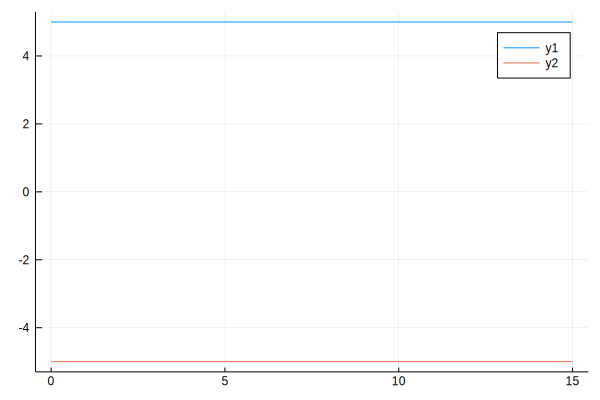

In [85]:
plot(t,K)
plot!(t,T)

In [86]:
@time r,Tm,Nm,Bm=Trayectoria(γ,Δt,t,Dt,k0,t0,K,T);

2033.694460 seconds (21.27 G allocations: 1011.085 GiB, 6.31% gc time)


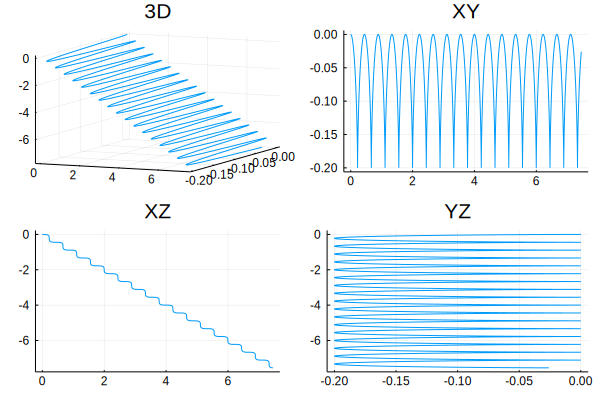

In [87]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(r[1],r[2],r[3], legend=false,title="3D")
P2=plot(r[1],r[2],legend=false,title="XY")
P3=plot(r[1],r[3],legend=false,title="XZ")
P4=plot(r[2],r[3],legend=false,title="YZ")
plot(P1,P2,P3,P4,layout=l)

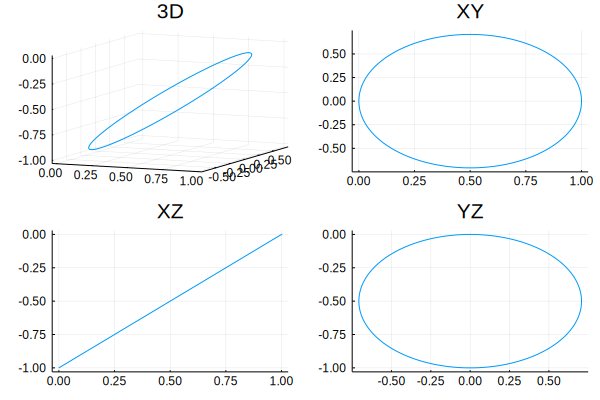

In [88]:
plot(Tm[1],Tm[2],Tm[3], legend=false)
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Tm[1],Tm[2],Tm[3], legend=false,title="3D")
P2=plot(Tm[1],Tm[2],legend=false,title="XY")
P3=plot(Tm[1],Tm[3],legend=false,title="XZ")
P4=plot(Tm[2],Tm[3],legend=false,title="YZ")
plot(P1,P2,P3,P4,layout=l)

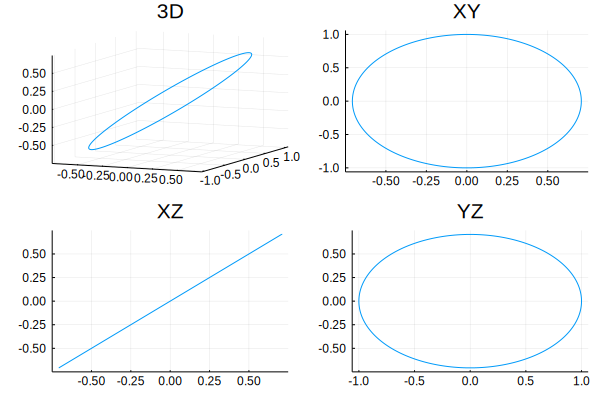

In [89]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Nm[1],Nm[2],Nm[3], legend=false,title="3D")
P2=plot(Nm[1],Nm[2],legend=false,title="XY")
P3=plot(Nm[1],Nm[3],legend=false,title="XZ")
P4=plot(Nm[2],Nm[3],legend=false,title="YZ")
plot(P1,P2,P3,P4,layout=l)

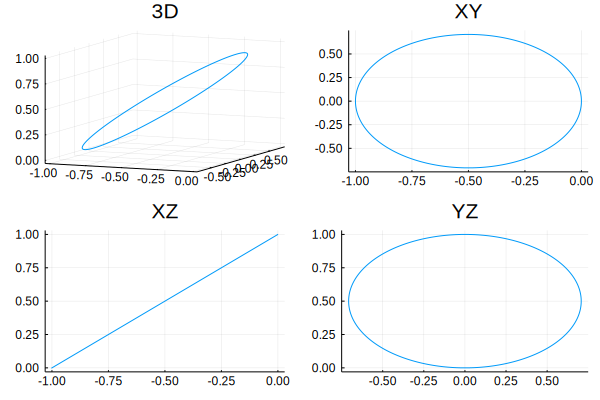

In [90]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(Bm[1],Bm[2],Bm[3], legend=false,title="3D")
P2=plot(Bm[1],Bm[2],legend=false,title="XY")
P3=plot(Bm[1],Bm[3],legend=false,title="XZ")
P4=plot(Bm[2],Bm[3],legend=false,title="YZ")
plot(P1,P2,P3,P4,layout=l)

In [91]:
r2,T2m,N2m=Trayectoria(γ,Δt,t,Dt,k0,K);

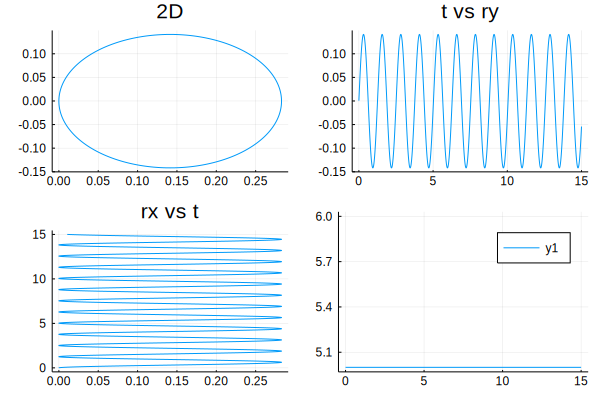

In [92]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(r2[1],r2[2], legend=false,title="2D")
P2=plot(r2[1],t,legend=false,title="rx vs t")
P3=plot(t,r2[2],legend=false,title="t vs ry")
P4=plot(t,K)
plot(P1,P3,P2,P4,layout=l)

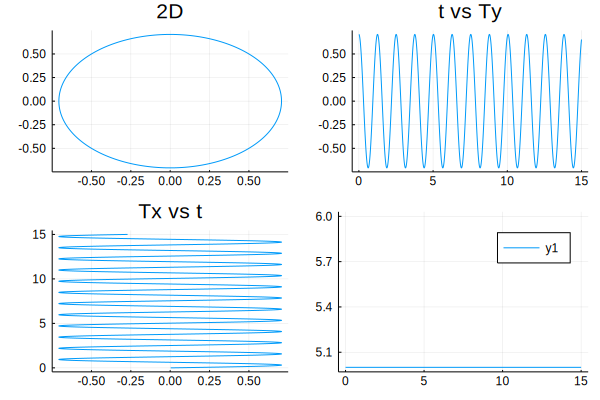

In [93]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(T2m[1],T2m[2], legend=false,title="2D")
P2=plot(T2m[1],t,legend=false,title="Tx vs t")
P3=plot(t,T2m[2],legend=false,title="t vs Ty")
P4=plot(t,K)
plot(P1,P3,P2,P4,layout=l)

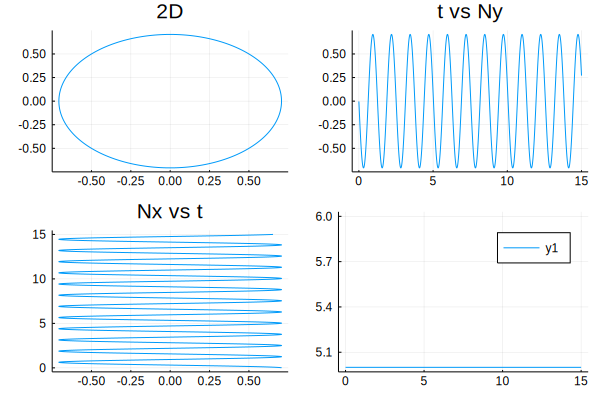

In [94]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
P1=plot(N2m[1],N2m[2], legend=false,title="2D")
P2=plot(N2m[1],t,legend=false,title="Nx vs t")
P3=plot(t,N2m[2],legend=false,title="t vs Ny")
P4=plot(t,K)
plot(P1,P3,P2,P4,layout=l)

In [ ]:
K=OUH(k0,γ,t,Δt,Dt,0.01);
T=OUH(t0,γ,t,Δt,Dt,0.01)
(eigen2(2,K,T,Δt).vectors)[:,1]

In [ ]:
angle.(eigvals(Mat(256,K,T,Δt)))

In [ ]:
length(t)

In [ ]:
OUH(k0,γ,t,Δt,Dt,0.01)

In [ ]:
Δt=0.001
K=2
T=4
(diagm(0 => ones(3))+diagm(1 => [K,T]*Δt,-1 => -[K,T]*Δt)+(0.5*diagm(1 => [K,T]*Δt,-1 => -[K,T]*Δt)^2))